In [9]:
#show training imgs
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets
import torch.optim as optim
#from torchvision import InterpolationMode

from sklearn.manifold import TSNE as TSNE
from matplotlib import pyplot as plt
import torch
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
import numpy as np


tensor([6, 8, 6, 6, 5, 2, 5, 6])
rowingmachine spinbike rowingmachine rowingmachine


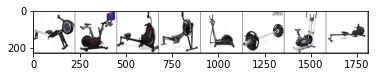

In [10]:
classes = ('abswing', 'abwheel', 'barbell','butterflygymmachine', 'dumbell', 'obitrack', 'rowingmachine', 'situpbench', 
           'spinbike', 'treadmill')
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    
transform = transforms.Compose([#transforms.RandomRotation(degrees=10),
                                #transforms.RandomHorizontalFlip(),
                                #transforms.RandomVerticalFlip(),
                                #transforms.ColorJitter(brightness=0.15, contrast=0.15),
                                transforms.ToTensor(),
                                transforms.Resize((224,224), interpolation = transforms.InterpolationMode.NEAREST)
                               ])

TrainData = datasets.ImageFolder(root = 'C:\\Users\\Mayu\\Downloads\\dataset\\dataset\\labeled\\', transform = transform )
TrainLoader = DataLoader(TrainData, batch_size = 8, shuffle=True, num_workers=4)

testData = datasets.ImageFolder(root = 'C:\\Users\\Mayu\\Downloads\\dataset\\dataset\\Test\\', transform = transform )
testLoader = DataLoader(TrainData, batch_size = 8, shuffle=True, num_workers=4)

labeledimages, labels = iter(TrainLoader).next()

print(labels)
imshow(torchvision.utils.make_grid(labeledimages))
print(' '.join(classes[labels[j]] for j in range(4)))

In [11]:
resnet18 = models.resnet18(pretrained=True)

for param in resnet18.parameters():
    param.requires_grad = True

fc_inputs = resnet18.fc.in_features


resnet18.fc = nn.Sequential(
   nn.Linear(fc_inputs, 128),
   nn.ReLU(),
   nn.Dropout(0.4),
   nn.Linear(128, 10)
)


net = resnet18.cuda()

In [12]:
criterian = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)

[1,     3] loss: 2.30976176
[1,     6] loss: 2.03121332
[1,     9] loss: 2.42890207
[1,    12] loss: 2.08048964
[1,    15] loss: 1.90698675
[1,    18] loss: 1.71558305
[1,    21] loss: 1.56760955
[1,    24] loss: 1.69059237
[1,    27] loss: 0.96231916
[1,    30] loss: 1.18548264
[1,    33] loss: 2.24983799
[1,    36] loss: 1.33987780
[1,    39] loss: 0.99201874
[2,     3] loss: 1.11366063
[2,     6] loss: 0.79769695
[2,     9] loss: 0.83014590
[2,    12] loss: 0.78411794
[2,    15] loss: 1.01660624
[2,    18] loss: 1.28854410
[2,    21] loss: 0.94769828
[2,    24] loss: 0.66480883
[2,    27] loss: 0.72823904
[2,    30] loss: 0.88398830
[2,    33] loss: 1.09248038
[2,    36] loss: 0.28055132
[2,    39] loss: 0.81530039
supervised training finished


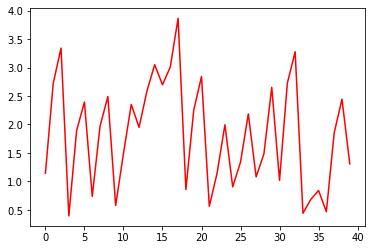

In [13]:
#training
for epoch in range(100):
    count = 0
    running_loss = 0.0
    loss_values = []
    
    for i, data in enumerate(TrainLoader):
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterian(outputs, labels)
        #optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        loss_values.append(running_loss)
        if i % 3 == 2:
            print('[%d, %5d] loss: %.8f' %
                 (epoch+1, i+1, running_loss/3))
            running_loss = 0.0
print("supervised training finished")
plt.plot(np.array(loss_values), 'r')


In [16]:
#testing
correct = 0
total = 0
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = net(images)
        print(outputs)
        p, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print(predicted , p)
        
print('Accuracy of the net on the  test images with training: %d %%' % (
100 * correct/ total))

tensor([[ 2.2045,  0.5089, -3.6907,  4.7361, -1.3352,  0.0367, -2.5583, -3.7849,
          2.8114, -0.3849],
        [ 0.6484,  1.4740, -1.0752, -0.7537, -2.9933, -4.6443, -1.2856,  9.6571,
         -2.1444,  2.8204],
        [-0.6816, -4.3309, -0.7116,  1.4345, -2.4849, -0.9891,  9.1550,  0.2683,
          1.4115, -1.7827],
        [-2.2159, -4.0340, -1.6827,  0.9563, -2.9011, -3.7752, 10.1418,  3.6550,
          1.4602, -1.3908],
        [-2.3355,  0.9710,  2.4346, -2.3221, -2.5577, -3.3283, -1.8169, -0.7870,
          1.2963, 10.3048],
        [-1.5210,  0.3862,  1.7152, -1.4141, -0.4154, -0.4033, -0.3598, -1.2881,
          0.6574,  2.4124],
        [-0.5085,  1.0228,  1.1318, -1.5146,  2.5797,  1.4511, -0.4879, -2.2440,
          1.3524, -0.9274],
        [-2.1986,  2.3646,  3.5055, -2.4018,  5.0354,  0.4701, -1.5720, -2.9445,
          0.9287, -1.4536]], device='cuda:0')
tensor([3, 7, 6, 6, 9, 9, 4, 4], device='cuda:0') tensor([ 4.7361,  9.6571,  9.1550, 10.1418, 10.3048,  2.4124

tensor([[ 1.1087, -1.4759,  0.0885,  5.2255, -1.2502,  4.6642, -1.7395, -5.4928,
          3.8481,  0.6038],
        [-0.2112, -2.7523,  0.5044, -3.4798,  0.6290, -0.0665, -2.8591,  0.3703,
         -1.0519,  5.1887],
        [-1.9445,  3.6506,  3.8501, -3.8830,  6.4566, -1.5587, -0.5860, -1.9391,
          0.6772, -2.7701],
        [-0.6422,  0.2756,  0.2761,  1.8789,  1.7734, -1.2476,  0.5764, -0.9912,
          0.5906, -1.2421],
        [-0.3264, -5.4729, -2.1454,  4.9384, -2.2835,  6.5369, -1.4636, -6.9473,
          6.9336,  2.3748],
        [-0.4681, -0.9205, -2.7323,  0.6990, -3.3509, -6.1308,  3.8670,  6.5427,
         -0.9640,  2.3650],
        [ 1.7750, -2.0655, -1.6579,  0.4791, -1.5746,  0.3671,  3.8856,  1.4839,
         -1.4432,  0.2134],
        [ 2.7237,  1.2534, -2.3952, -0.3253, -2.0276, -5.9466, -1.8033,  7.4596,
         -1.2863,  2.3086]], device='cuda:0')
tensor([3, 9, 4, 3, 8, 7, 6, 7], device='cuda:0') tensor([5.2255, 5.1887, 6.4566, 1.8789, 6.9336, 6.5427, 3.88

tensor([[ 5.5661e+00,  1.0518e+01, -1.6414e+00, -1.5191e+00,  1.6500e+00,
         -4.6293e+00, -8.5007e+00,  2.0090e+00, -5.6192e+00,  1.1634e+00],
        [-1.1310e+00, -3.5828e+00, -1.5788e+00, -8.7810e-01, -1.1078e+00,
          4.3676e-01,  1.0246e+00, -1.8414e+00,  8.5196e+00, -2.5017e+00],
        [-1.2183e+00, -3.9853e-01,  3.4498e+00, -8.5463e-01,  2.0608e+00,
         -1.6981e+00,  2.6655e-01,  4.1248e-01, -7.1430e-01,  9.9172e-01],
        [-3.5205e-01, -2.4745e-01,  1.0142e+00, -1.6842e-02, -5.6193e-01,
         -1.1706e+00,  1.7127e+00,  1.3497e+00, -1.2144e+00,  6.2983e-01],
        [-1.0824e-01, -2.2100e+00, -4.9688e+00,  1.1601e+01, -3.9626e+00,
          3.1980e+00,  2.9371e-03, -4.2996e+00,  3.8279e+00, -8.4541e-01],
        [ 3.5698e-01,  8.5731e-02, -9.6783e-01, -2.8994e+00, -8.3833e-01,
          6.0936e-01, -1.0651e+00, -2.8579e+00,  7.9191e+00,  2.1214e-01],
        [ 2.6385e+00, -4.4522e+00, -3.0921e+00,  4.7576e+00, -2.5963e+00,
          6.3422e+00, -7.6027e-0

tensor([[-0.8468,  1.3613,  2.3394, -0.5682,  3.8258, -0.3720, -0.5592, -0.7193,
         -0.3461, -1.4740],
        [-0.9669, -4.7703, -1.4694,  1.7191, -2.4636, -1.2356,  6.8983, -0.5534,
          3.6589, -0.7265],
        [ 0.6984,  8.4623, -0.2211,  0.2503, -0.8295, -3.7104, -3.5866,  1.5658,
         -1.3688, -1.0534],
        [ 0.0553, -0.0774,  0.1713,  0.1306, -0.0629, -0.8967, -0.4910,  0.0771,
          0.1189,  0.9795],
        [-0.7666, -6.3772, -3.1449,  2.6549, -5.0396, -4.8201, 12.3928,  2.5942,
          3.2262, -0.6852],
        [-0.0488, -4.1839, -0.5040, -0.2748, -3.3741,  0.1785, -4.0242, -1.5520,
          2.2697, 11.5878],
        [ 2.1365, -1.0600, -1.8777,  1.5086, -0.2339, -0.7406,  0.8945,  0.0272,
          0.9053, -0.0592],
        [-1.5834, -1.3873,  3.1989, -0.6337,  3.6585,  1.0726, -1.4365, -2.6771,
         -0.2917,  0.9417]], device='cuda:0')
tensor([4, 6, 1, 9, 6, 9, 0, 4], device='cuda:0') tensor([ 3.8258,  6.8983,  8.4623,  0.9795, 12.3928, 11.5878

tensor([[-2.5786, -1.2962,  3.6565, -4.9249, -1.1961, -0.7853, -1.5874, -2.1744,
          0.6568,  9.2070],
        [ 1.5331, -1.0403, -2.3966,  0.3897, -1.0624,  1.4977, -2.1181, -0.6834,
          2.8819,  0.7210],
        [ 0.7207,  2.9331,  0.9224, -1.2172,  2.5990, -0.3621, -0.9993, -0.6202,
         -1.9815, -0.9282],
        [ 5.0181, -0.6986, -2.4410,  0.4579, -2.8830,  0.3177,  3.9767, -0.1146,
         -3.3850, -0.4479],
        [ 0.1007, -0.2292, -0.9604, -0.2779, -0.4180, -0.3959, -1.4404,  0.5171,
         -0.0884,  3.6526],
        [-3.6700, -3.4496, -4.8243, 11.3808, -3.7385, -1.5464,  4.3697, -2.2651,
          8.0978, -3.5476],
        [-1.7052, -3.2696,  1.8550, -1.7002,  0.2171,  0.2969, -1.6616,  0.2411,
         -0.6321,  3.9436],
        [ 0.7301,  1.0746, -4.1786,  1.4971, -2.0800, -4.0975,  1.3036,  4.6224,
         -1.3309,  0.9348]], device='cuda:0')
tensor([9, 8, 1, 0, 9, 3, 9, 7], device='cuda:0') tensor([ 9.2070,  2.8819,  2.9331,  5.0181,  3.6526, 11.3808

tensor([[ 6.4928e-01,  1.8949e+00, -2.0200e+00,  1.0411e+00, -1.1589e+00,
         -5.2345e+00,  8.7916e-01,  4.9078e+00, -1.9739e+00,  1.3590e-02],
        [-5.4676e-01, -4.0276e+00, -1.7868e+00,  4.5254e+00, -3.4144e+00,
          1.8919e+00,  3.2219e+00, -1.5724e+00,  2.9332e+00, -4.2289e-01],
        [ 5.8553e-01, -6.6982e-01, -2.4624e+00,  6.1244e+00, -1.5132e+00,
          6.3027e-01,  2.4609e-01, -3.0212e+00,  3.3937e+00,  2.7101e-01],
        [-8.0268e-01, -6.3501e-01, -5.4629e-01, -8.5835e-01, -1.5586e-01,
         -8.6145e-01, -2.4277e-01,  1.0572e+00,  3.0001e-01,  1.4628e+00],
        [ 3.5955e+00,  1.3651e+01,  3.9670e-01, -2.6070e+00,  5.2064e+00,
         -3.9303e+00, -6.3096e+00, -1.4238e-01, -6.2290e+00, -2.3256e+00],
        [-2.6534e+00, -3.2875e+00,  7.8938e-01, -1.1470e+00, -9.1649e-01,
          2.8039e+00, -1.0764e-02, -3.5701e+00,  7.7814e+00,  1.2468e+00],
        [ 2.5174e+00, -1.6761e+00, -1.8227e+00,  5.9697e+00, -9.3360e-01,
          5.7589e+00, -1.1942e+0

In [ ]:
import torch
import torchvision
resnet18 = torchvision.models.resnet18(pretrained=True)
resnet18.eval()
example_inputs = torch.rand(1, 3, 224, 224)
resnet18_traced = torch.jit.trace(resnet18, example_inputs = example_inputs)
resnet18_traced.save("resnet18_traced.pt")

In [8]:
import torch
import torchvision
resnet18 = torchvision.models.resnet18(pretrained=True)
resnet18.eval()
example_inputs = torch.rand(1, 3, 224, 224)
resnet18_traced = torch.jit.trace(net.cpu(), example_inputs = example_inputs)
resnet18_traced.save("resnet18_traced3.pt")

In [18]:
torch.save(net.state_dict(), "kk.pt")

In [22]:
model1 = net
model1.load_state_dict(torch.load("kk.pt"))
model1.state_dict().items()

odict_items([('conv1.weight', tensor([[[[-1.9662e-02, -1.1589e-02, -5.9739e-03,  ...,  5.1267e-02,
            1.4021e-02, -1.6678e-02],
          [ 8.9367e-04,  4.0500e-03, -1.1223e-01,  ..., -2.7443e-01,
           -1.3249e-01, -1.9352e-04],
          [-2.0346e-02,  5.2602e-02,  2.9086e-01,  ...,  5.1499e-01,
            2.5298e-01,  6.1655e-02],
          ...,
          [-3.6043e-02,  8.6839e-03,  6.5377e-02,  ..., -3.4189e-01,
           -4.2768e-01, -2.6130e-01],
          [ 2.0487e-02,  3.1191e-02,  5.5145e-02,  ...,  4.0475e-01,
            3.8775e-01,  1.6120e-01],
          [-2.5925e-02, -1.4341e-02, -3.4234e-02,  ..., -1.6100e-01,
           -8.7974e-02, -1.1640e-02]],

         [[-1.6017e-02, -2.7422e-02, -3.3627e-02,  ...,  3.2680e-02,
            3.2196e-03, -2.3865e-02],
          [ 3.9594e-02,  3.2264e-02, -1.0188e-01,  ..., -3.0979e-01,
           -1.5761e-01,  1.3581e-03],
          [-1.0055e-02,  9.6279e-02,  4.0241e-01,  ...,  7.0931e-01,
            3.7198e-01,  1.2

In [20]:
for data in testLoader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = model1(images)
        print(outputs)
        p, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print(predicted , p)
        

TypeError: 'collections.OrderedDict' object is not callable